In [1]:
import re
from datetime import datetime

def extract_log_info(log_file_path):
    log_info = {'time': [], 'loss': [], 'accuracy': []}
    start_time = None
    with open(log_file_path, 'r') as file:
        for line in file:
            # 提取时间
            time_match = re.search(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}', line)
            if time_match:
                current_time = datetime.strptime(time_match.group(0), '%Y-%m-%d %H:%M:%S')
                if start_time is None:
                    start_time = current_time
                elapsed_time = (current_time - start_time).total_seconds()
                log_info['time'].append(elapsed_time)

            # 提取损失
            loss_match = re.search(r'Loss: (\d+\.\d+(?:[eE][-+]?\d+)?)', line)
            if loss_match:
                log_info['loss'].append(float(loss_match.group(1)))

            # 提取准确率
            acc_match = re.search(r'Eval ACC: (\d+\.\d+(?:[eE][-+]?\d+)?)', line)
            if acc_match:
                log_info['accuracy'].append(float(acc_match.group(1)))

    return log_info

In [2]:
cheems = './logs/train_cheems.log'
cheems_info = extract_log_info(cheems)


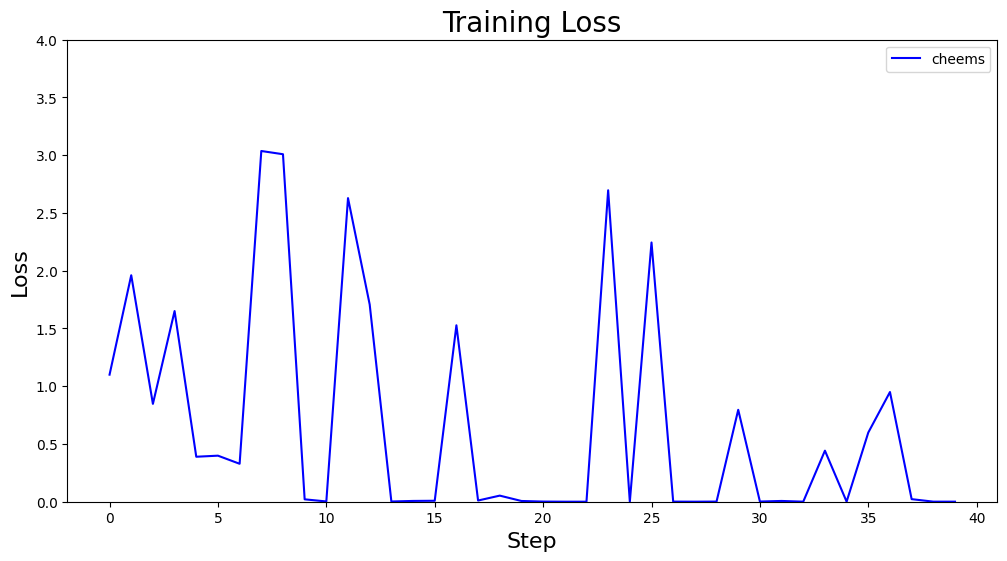

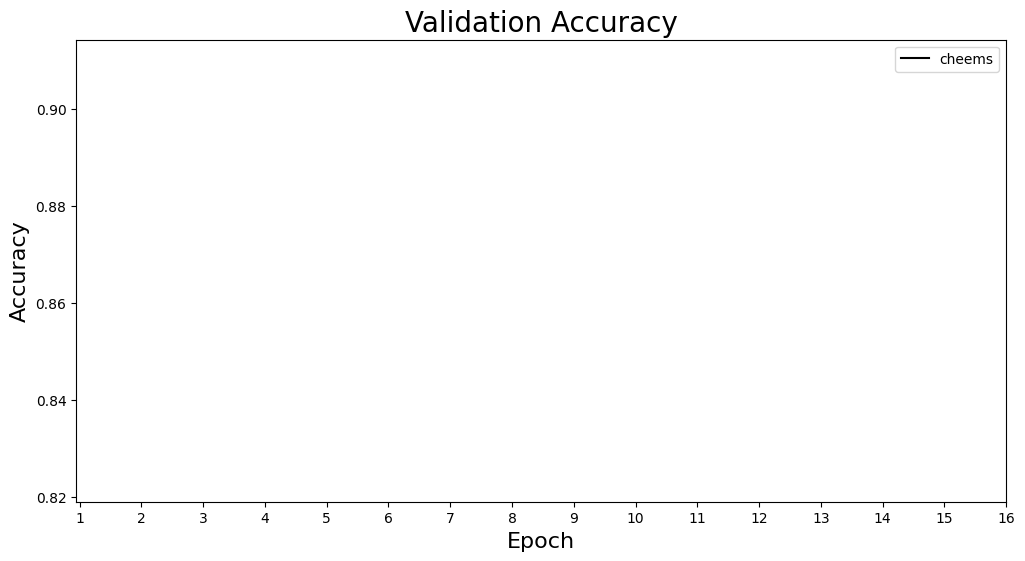

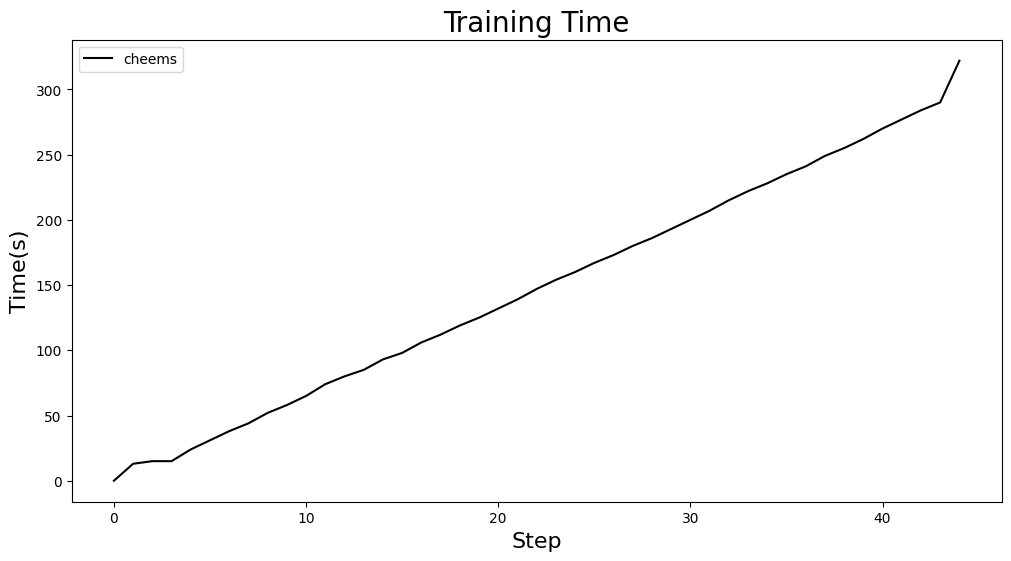

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 绘制损失对比图
plt.figure(figsize=(12, 6))
plt.title('Training Loss', fontsize=20)
plt.plot(cheems_info['loss'], label='cheems', color='blue')
# y刻度最大为1
plt.ylim(0, 4)
# plt.xticks(np.arange(len(bert_info['loss']), step=100), np.arange(0, len(bert_info['loss']), step=100))
plt.legend()
plt.xlabel('Step', fontsize=16)
plt.ylabel('Loss', fontsize=16)

# 绘制准确率对比图
plt.figure(figsize=(12, 6))
plt.title('Validation Accuracy', fontsize=20)
plt.plot(cheems_info['accuracy'], label='cheems', color='black')
plt.legend()
# 将x轴刻度设置为1到16但不会对info数据进行修改
plt.xticks(np.arange(16), np.arange(1, 17))
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

# 绘制时间对比图
plt.figure(figsize=(12, 6))
plt.title('Training Time', fontsize=20)
plt.plot(cheems_info['time'], label='cheems', color='black')
# plt.xticks(np.arange(len(bert_info['time']), step=100), np.arange(0, len(bert_info['time']), step=100))
plt.legend()
plt.xlabel('Step', fontsize=16)
plt.ylabel('Time(s)', fontsize=16)
plt.show()
